In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [56]:
data=pd.read_csv('/content/List of Countries by Sugarcane Production.csv')
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# ***Data cleaning***






In [57]:
data["Production (Tons)"]=data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"]=data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"]=data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"]=data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [58]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [59]:
data.rename(columns={"Production (Tons)":"Production(Tons)","Production per Person (Kg)":"Production_per_Person(Kg)","Acreage (Hectare)":"Acreage(Hectare)","Yield (Kg / Hectare)":"Yield(Kg / Hectare)"},inplace=True)

In [60]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [61]:
data.isnull().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
Production_per_Person(Kg),0
Acreage(Hectare),1
Yield(Kg / Hectare),1


In [62]:
data[data["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [63]:
data=data.dropna().reset_index(drop=True)

In [64]:
data.shape

(102, 7)

In [65]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [66]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [67]:
data.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_Person(Kg),object
Acreage(Hectare),object
Yield(Kg / Hectare),object


In [72]:

data["Production(Tons)"]=data["Production(Tons)"].astype(float)
data["Production_per_Person(Kg)"]=data["Production_per_Person(Kg)"].astype(float)
data["Acreage(Hectare)"]=data["Acreage(Hectare)"].astype(float)
data["Yield(Kg / Hectare)"]=data["Yield(Kg / Hectare)"].astype(float)

In [73]:
data.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_Person(Kg),float64
Acreage(Hectare),float64
Yield(Kg / Hectare),float64


In [76]:
data.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_Person(Kg),101
Acreage(Hectare),101
Yield(Kg / Hectare),102


# Univariate Analysis

***how many countries produces sugercane from each continent***:

In [78]:
data["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


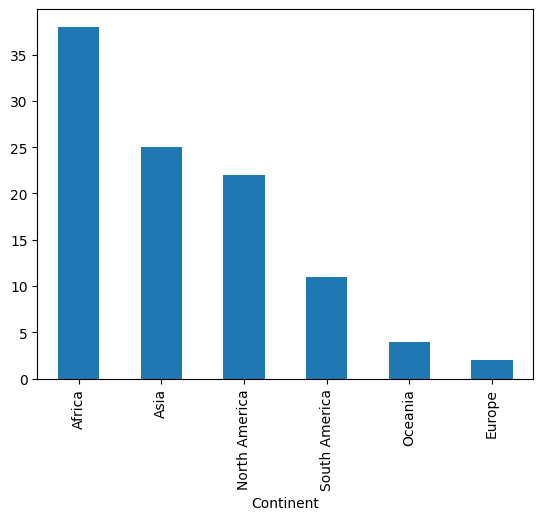

In [80]:
data["Continent"].value_counts().plot(kind="bar")
plt.show()

## **Checking** **outlier**

<ipython-input-81-3844457e52f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production(Tons)"])
<ipython-input-81-3844457e52f1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production_per_Person(Kg)"])
<ipython-input-81-3844457e52f1>:7: UserWarning: 

`distplot` is a depreca

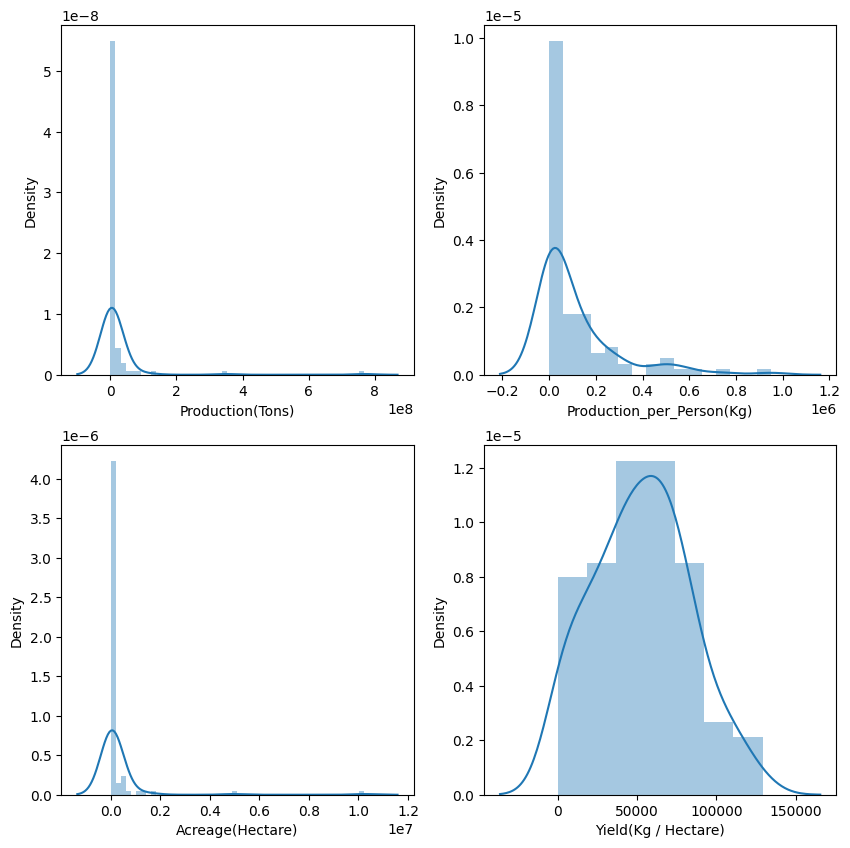

In [81]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(data["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(data["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(data["Yield(Kg / Hectare)"])
plt.show()

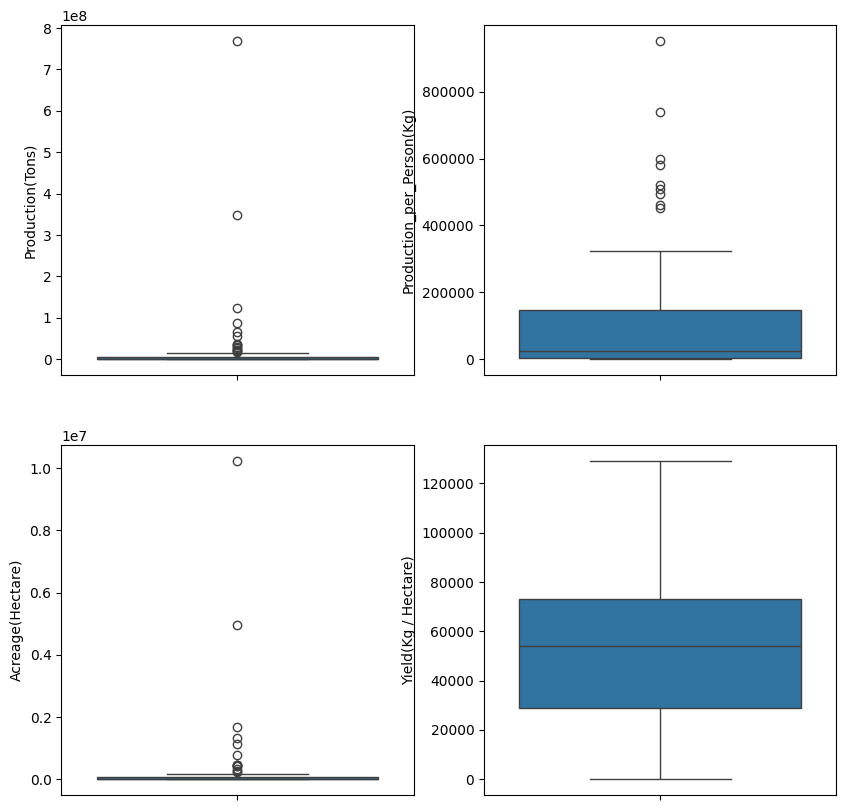

In [83]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(data["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(data["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(data["Yield(Kg / Hectare)"])
plt.show()

In [85]:
data.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# **Bivariate Analysis**

**which country prouces maximum sugercane?**

In [120]:
data_new=data[["Country","Production(Tons)"]].set_index("Country")
data_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [121]:
data_new["production_percent"]=data_new["Production(Tons)"]*100/data_new["Production(Tons)"].sum()

In [125]:
data_new

,Production(Tons),production_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


In [123]:
data_new.shape

(102, 2)

<Axes: ylabel='production_percent'>

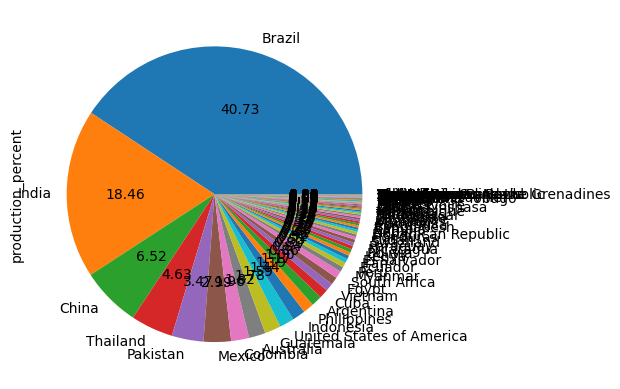

In [124]:

data_new["production_percent"].plot(kind="pie",autopct="%.2f")


<Axes: xlabel='Country'>

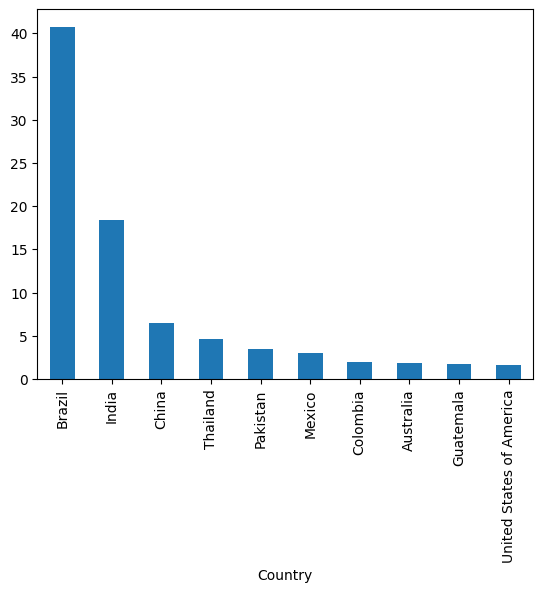

In [129]:
data_new["production_percent"].head(10).plot(kind="bar")

<ipython-input-133-22a1d599661d>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

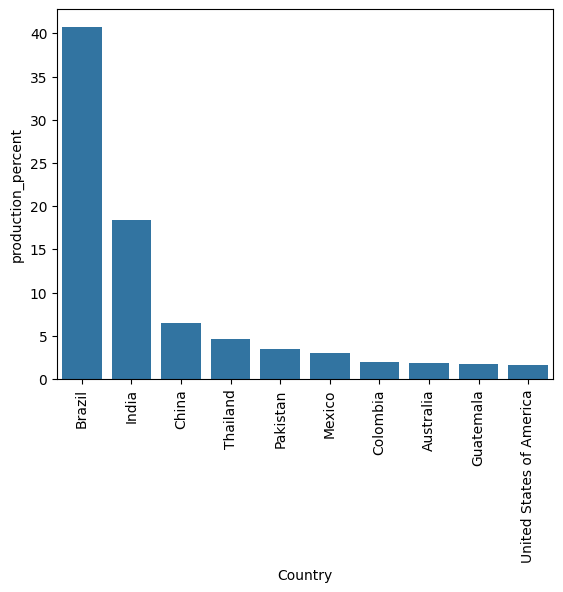

In [133]:
ax=sns.barplot(data_new.head(10),x="Country",y="production_percent")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

 **Country has highest land**

<ipython-input-136-94ecb72ee8cd>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

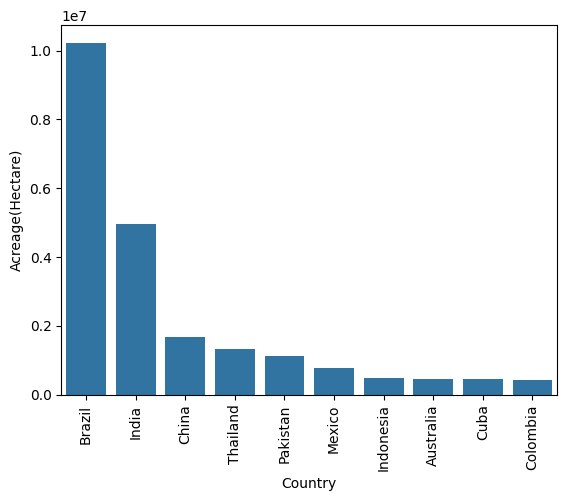

In [136]:
acr=data.sort_values(by="Acreage(Hectare)",ascending=False)
acr.head()
ax=sns.barplot(acr.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

**Which country has highest yield per hectare**

In [137]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<ipython-input-138-bf6d28e2be8d>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

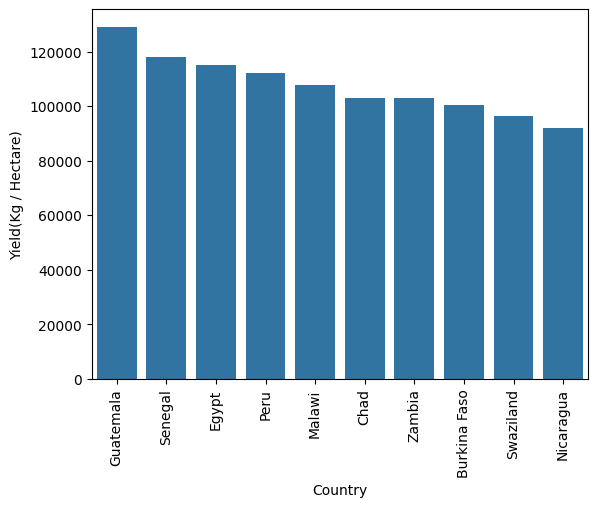

In [138]:
yh=data.sort_values(by="Yield(Kg / Hectare)",ascending=False)
yh.head()
ax=sns.barplot(yh.head(10),x="Country",y="Yield(Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

**Do countries with highest land produce more sugercane**

<Axes: >

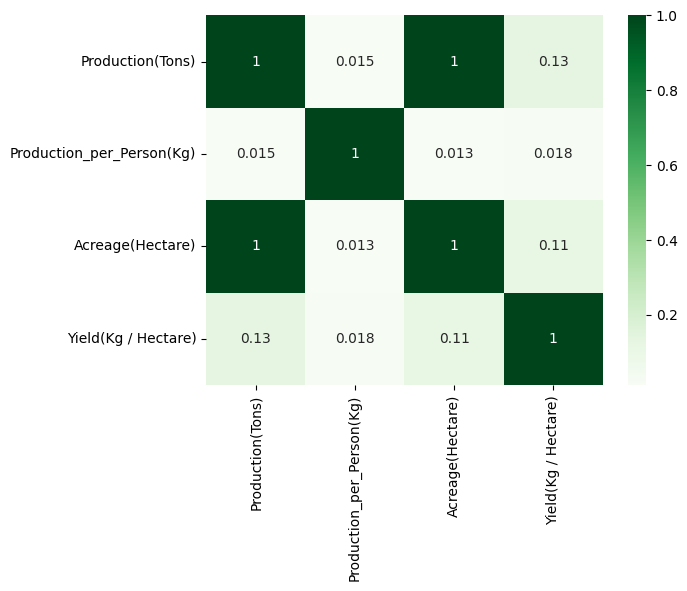

In [144]:
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,cmap="Greens")


**Do countries with highest land produces more sugercane**

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

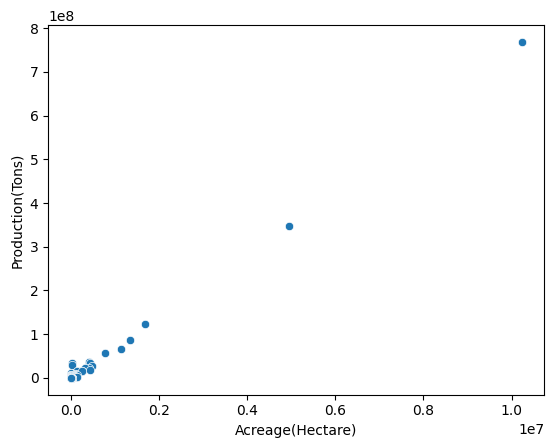

In [145]:
sns.scatterplot(data=data,x="Acreage(Hectare)",y="Production(Tons)")

**Do countries which yield more sugercane per hectare produces more sugercane in total?**

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Production(Tons)'>

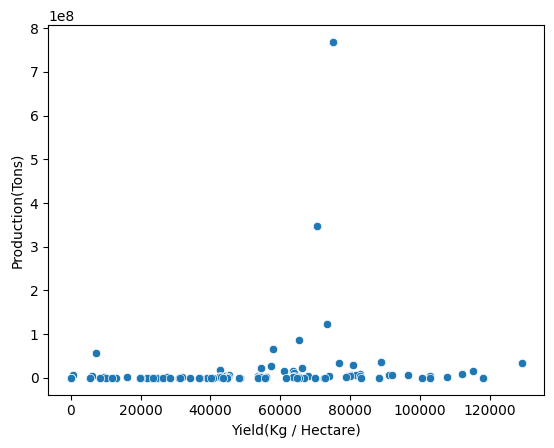

In [146]:
sns.scatterplot(data=data,x="Yield(Kg / Hectare)",y="Production(Tons)")

##Analysis for Continent

In [147]:
data_continent=data.groupby("Continent").sum()
data_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


**Which country has produces highest sugercane?**

<Axes: xlabel='Continent'>

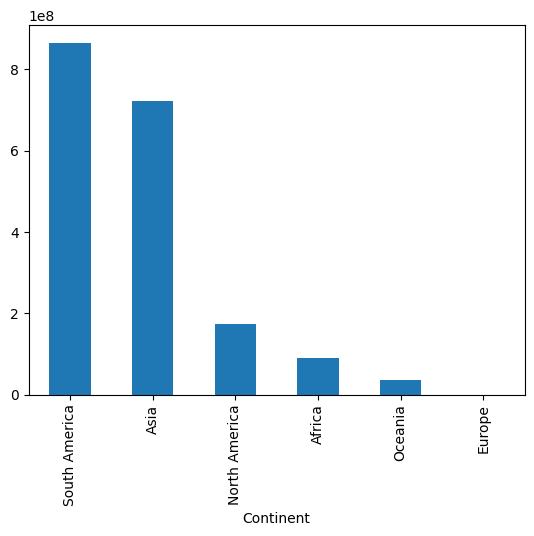

In [150]:
data_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")


**Do number of countries in the continent effect production of suger**

<Axes: xlabel='Continent', ylabel='Production(Tons)'>

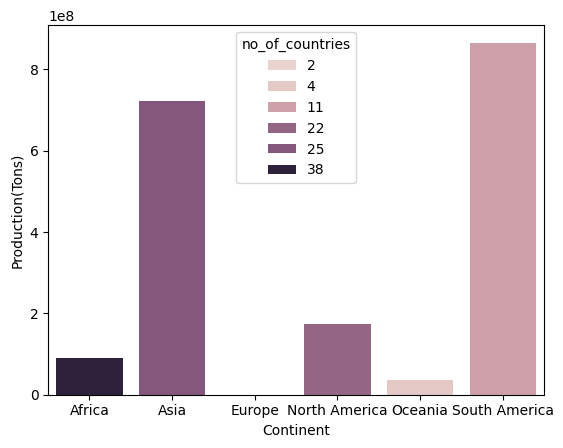

In [152]:
data_continent["no_of_countries"]=data["Continent"].value_counts()
sns.barplot(data_continent,x="Continent",y="Production(Tons)",hue="no_of_countries")

**Production distribution by continent**

<Axes: ylabel='Production(Tons)'>

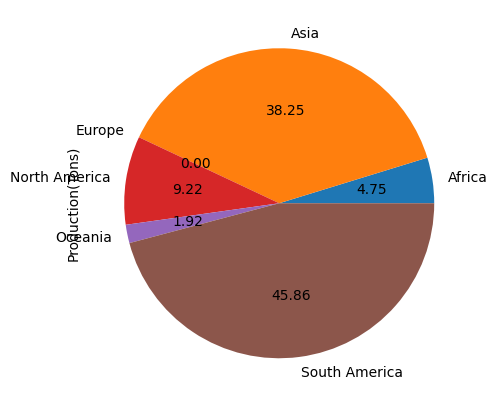

In [159]:
data_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f",figsize=(5,10))